## HOMEWORK 2
#### LESTER D. PIORQUE BSCS IV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [7]:
most_movies = data.groupby("director_name")["director_name"].count()  # Grouping the data based on the director's name
most_movies.head(10)

director_name
0                  104
A. Raven Cruz        1
Aaron Hann           1
Aaron Schneider      1
Aaron Seltzer        1
Abel Ferrara         1
Adam Brooks          1
Adam Carolla         1
Adam Goldberg        1
Adam Green           1
Name: director_name, dtype: int64

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

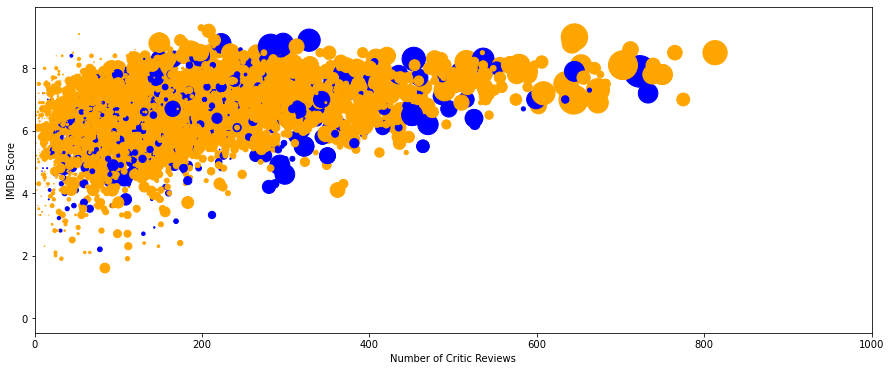

In [10]:
plt.figure(figsize=(15,6)) # Plot for the gross, imdb score, and number of critic
sizes = 1000*((data["gross"] - min(data["gross"])) / max(data["gross"] ) - min(data["gross"] ))
colors = np.where(data.genres.str.contains("Fantasy"), 'blue', 'orange')
plt.scatter(x=data["num_critic_for_reviews"], y=data["imdb_score"], c=colors, s = sizes)

plt.xlabel("Number of Critic Reviews")
plt.ylabel("IMDB Score")
plt.xlim((0,1000))
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [12]:
data['sales'] = (data['gross']-data['budget'])  # Computing for sales column
data[['movie_title', 'director_name', 'gross', 'budget', 'sales']]

,movie_title,director_name,gross,budget,sales
0,b'Avatar',James Cameron,760505847.0,237000000.0,523505847.0
1,"b""Pirates of the Caribbean: At World's End""",Gore Verbinski,309404152.0,300000000.0,9404152.0
2,b'Spectre',Sam Mendes,200074175.0,245000000.0,-44925825.0
3,b'The Dark Knight Rises',Christopher Nolan,448130642.0,250000000.0,198130642.0
4,b'Star Wars: Episode VII - The Force Awakens ...,Doug Walker,0.0,0.0,0.0
...,...,...,...,...,...
5039,b'The Following ',0,0.0,0.0,0.0
5040,b'A Plague So Pleasant',Benjamin Roberds,0.0,1400.0,-1400.0
5041,b'Shanghai Calling',Daniel Hsia,10443.0,0.0,10443.0
5042,b'My Date with Drew',Jon Gunn,85222.0,1100.0,84122.0


## Which directors garnered the most total sales?

In [116]:
most_total_sales = data.sort_values(by='sales', ascending = False)  # Sorting the table based on the highest sales
most_total_sales[['director_name', 'movie_title', 'sales']][:10]

,director_name,movie_title,sales
0,James Cameron,b'Avatar',523505847.0
29,Colin Trevorrow,b'Jurassic World',502177271.0
26,James Cameron,b'Titanic',458672302.0
3024,George Lucas,b'Star Wars: Episode IV - A New Hope',449935665.0
3080,Steven Spielberg,b'E.T. the Extra-Terrestrial',424449459.0
17,Joss Whedon,b'The Avengers',403279547.0
794,Joss Whedon,b'The Avengers',403279547.0
509,Roger Allers,b'The Lion King',377783777.0
240,George Lucas,b'Star Wars: Episode I - The Phantom Menace',359544677.0
66,Christopher Nolan,b'The Dark Knight',348316061.0


## Plot sales and average likes as a scatterplot. Fit it with a line.

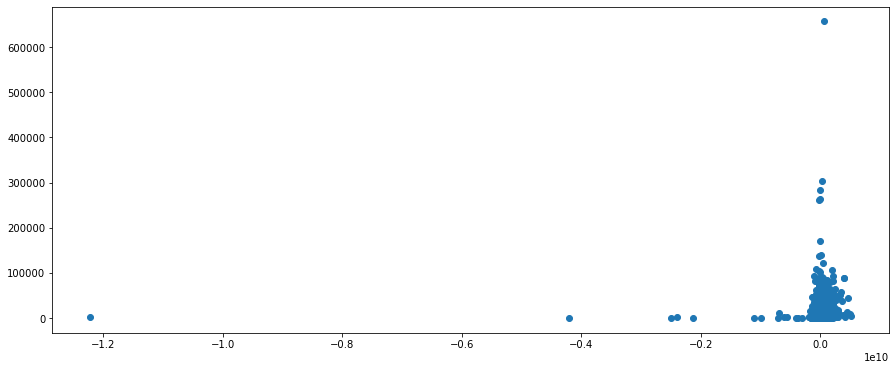

In [13]:
fig = plt.figure(figsize=(15,6))  # Scatterplot for sales and total fb likes
plt.scatter(data["sales"], data["cast_total_facebook_likes"])
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

KeyboardInterrupt: 

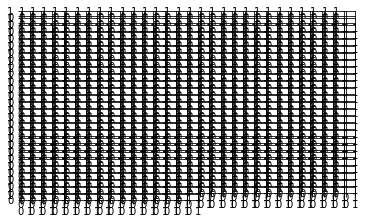

In [15]:
data.hist(column='sales', by='genres');  # histogram for sales and genres

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [ ]:
# Getting the mean of three actors
data['average_actor_likes'] = ((data['actor_1_facebook_likes'] + data['actor_2_facebook_likes'] + data['actor_2_facebook_likes'])/3)
data[['actor_1_name','actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'average_actor_likes']]

## Copying the whole dataframe

In [35]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [36]:
# Normalizing each integer or float column and adding another column
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)

max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)

max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)

max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)

max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)

max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (df['gross'] - min) / (max-min)

max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)

max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)

max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)

max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)

max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)

max = df['title_year'].max()
min = df['title_year'].min()
df['nm_title_year'] = (df['title_year'] - min) / (max-min)

max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)

max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)

max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)

max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)

max = df['sales'].max()
min = df['sales'].min()
df['nm_sales'] = (df['sales'] - min) / (max-min)

df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,nan,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905
